In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
# Drop rows where all columns are NaN
df.dropna(how='all', inplace=True)


In [4]:
df = df.drop_duplicates(subset='title', keep=False)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     358 non-null    object
 1   deal_price                358 non-null    object
 2   screen_type               358 non-null    object
 3   hdmi_count                358 non-null    int64 
 4   usb_count                 358 non-null    int64 
 5   os                        358 non-null    object
 6   smart_tv                  358 non-null    object
 7   display_size              358 non-null    object
 8   hd_technology_resolution  358 non-null    object
 9   launch_year               358 non-null    int64 
 10  model_name                358 non-null    object
dtypes: int64(3), object(8)
memory usage: 33.6+ KB


In [6]:
# Removing currency symbol and making column to int and rename the column to price
df['deal_price'] = df['deal_price'].str.replace('₹', '').str.replace(',', '', regex=True).astype('int64')
df.rename(columns={'deal_price': 'Price'}, inplace=True)

In [7]:
import re
# Extract content within parentheses and create a new column 'Display size (inch)' (case-insensitive)
df['Display size (inch)'] = df['display_size'].str.extract(r'\((\d+) Inch\)', flags=re.IGNORECASE).astype('int64')


In [8]:
df['Display size (cm)'] = df['display_size'].str.extract(r'(\d+\.\d+|\d+)').apply(pd.to_numeric)
# Drop the 'display_size' column
df = df.drop(columns=['display_size'])

In [9]:

# Extract the first word from each 'title' and save it to a new 'Brand' column
df['Brand'] = df['title'].str.split().str[0]


In [10]:
# Drop the 'hd_technology_resolution' column
df.drop(columns=['title'], inplace=True)

In [11]:
# Replace "Linux based" with "Linux" and "Android based" with "Android" in the 'os' column
df['os'] = df['os'].replace({'Linux based': 'Linux', 'Android based': 'Android'})

In [12]:
df.isnull().sum() # finding os from other website

Price                       0
screen_type                 0
hdmi_count                  0
usb_count                   0
os                          0
smart_tv                    0
hd_technology_resolution    0
launch_year                 0
model_name                  0
Display size (inch)         0
Display size (cm)           0
Brand                       0
dtype: int64

In [13]:
# Split the column into two parts before and after the comma
df['Resolution_Type'] = df['hd_technology_resolution'].str.split(',', 1, expand=True)[0]

# Drop the original 'hd_technology_resolution' column
df.drop(columns=['hd_technology_resolution'], inplace=True)

In [14]:
# Create a mapping of resolution names to pixel values
resolution_mapping = {
    'HD Ready': (1280, 720),
    'Full HD': (1920, 1080),
    'Ultra HD (4K)': (3840, 2160),
    'Ultra HD (8K)': (7680, 4320),
    'SD': (720, 480)
}

# Replace 'YourColumnName' with the actual column name in your DataFrame
df[['X_Pixel', 'Y_Pixel']] = df['Resolution_Type'].map(resolution_mapping).apply(pd.Series).astype('int')

In [15]:
# Reverse the order of columns in the DataFrame
df = df[df.columns[::-1]]

In [16]:
duplicate_rows = df[df.duplicated(keep=False)]

In [17]:
duplicate_rows
df.to_csv("Data Cleaning.csv", header=True, index=False)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Data Cleaning.csv")

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

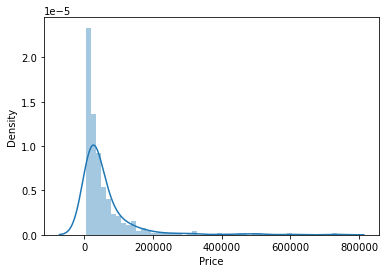

In [19]:
sns.distplot(df['Price'])

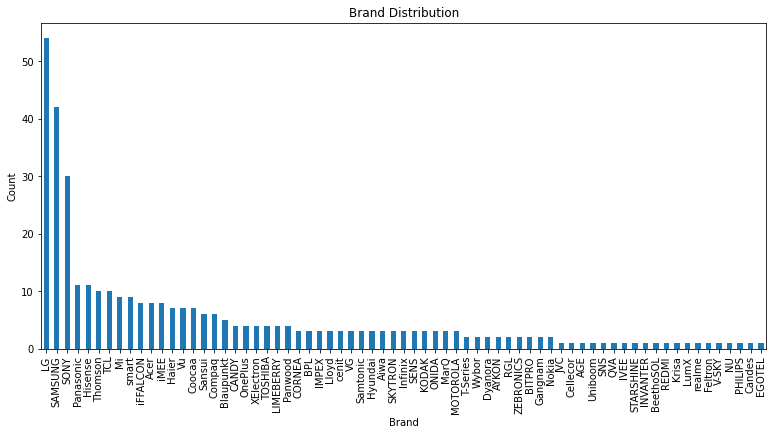

In [20]:
#Brand Count
brand_counts = df['Brand'].value_counts()

# Create a bar graph
plt.figure(figsize=(13, 6))  # Adjust the figure size as needed
brand_counts.plot(kind='bar')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [21]:
df['Brand'].value_counts()

LG           54
SAMSUNG      42
SONY         30
Panasonic    11
Hisense      11
             ..
V-SKY         1
NU            1
PHILIPS       1
Candes        1
EGOTEL        1
Name: Brand, Length: 69, dtype: int64

In [22]:
brand_counts = df['Brand'].value_counts()

# Print brands with a count of 1
unique_brands = brand_counts[brand_counts == 1].index

for brand in unique_brands:
    print(brand)

JVC
Cellecor
AGE
Uniboom
SNS
QVA
IVEE
STARSHINE
INVANTER
BeethoSOL
REDMI
Krisa
LumX
realme
Feltron
V-SKY
NU
PHILIPS
Candes
EGOTEL


In [23]:
# Define the cat_os function
def cat_brand(inp):
    
    if inp in ['JVC','Cellecor','AGE','Uniboom','SNS','QVA','IVEE','STARSHINE','INVANTER','BeethoSOL','REDMI','Krisa','LumX','realme',
    'Feltron',
    'V-SKY',
    'NU',
    'PHILIPS',
    'Candes',
    'EGOTEL']:
        return 'Others'
    else:
        return inp

# Apply the function to the 'OS' column
df['Brand'] = df['Brand'].apply(cat_brand)

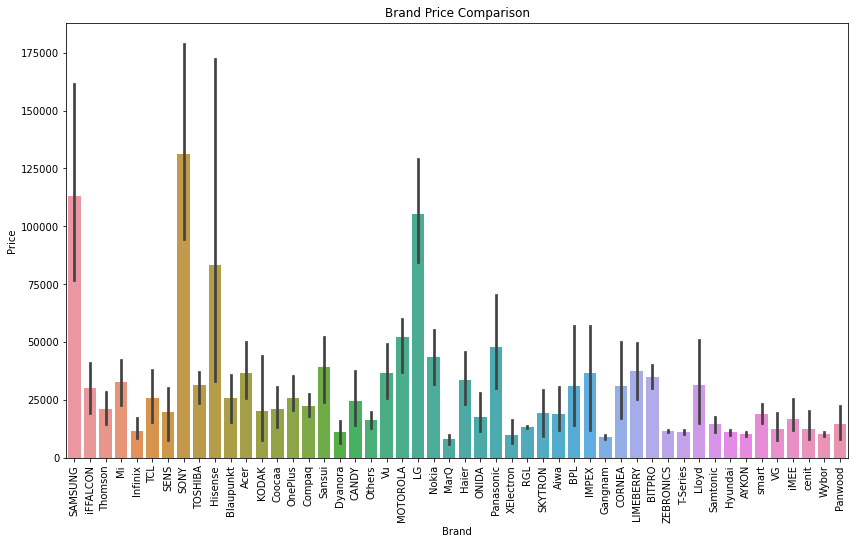

In [24]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='Brand', y='Price', data=df)  
plt.title('Brand Price Comparison')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Display size (inch)', ylabel='Density'>

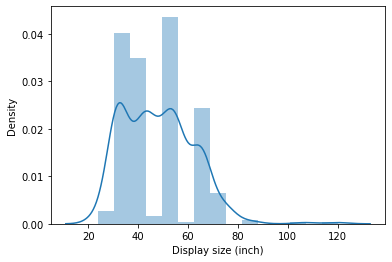

In [25]:
sns.distplot(df['Display size (inch)'])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Display size (cm)', ylabel='Density'>

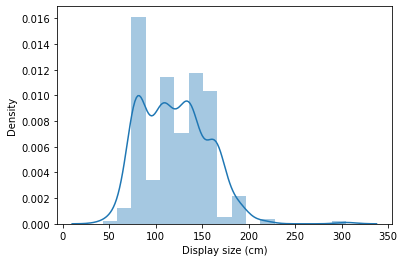

In [26]:
sns.distplot(df['Display size (cm)'])

In [27]:
df['launch_year']=df['launch_year'].astype('int64')

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='launch_year', ylabel='Density'>

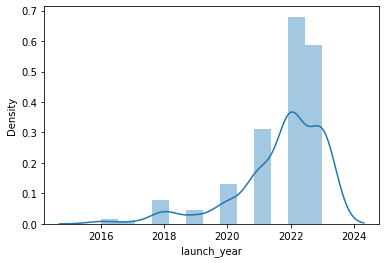

In [28]:
sns.distplot(df['launch_year'])

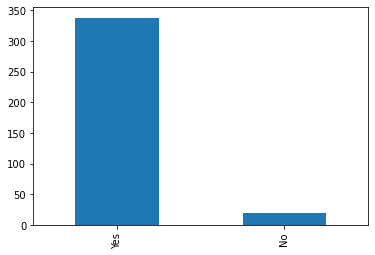

In [29]:
counts = df['smart_tv'].value_counts()
counts.plot(kind='bar')
plt.show()

In [30]:
# Replace "yes" with 1 and "no" with 0
df['smart_tv'] = df['smart_tv'].map({'Yes': 1, 'No': 0})

In [31]:
df['smart_tv'].value_counts()

1    338
0     20
Name: smart_tv, dtype: int64

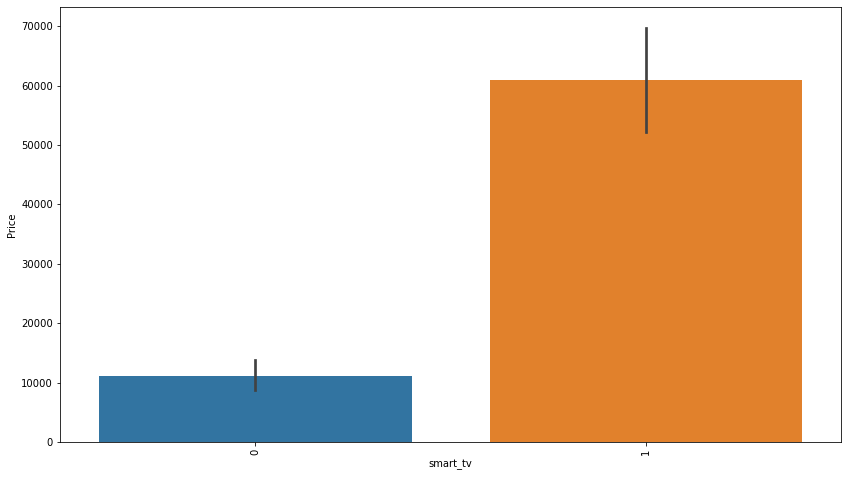

In [32]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='smart_tv', y='Price', data=df)  
plt.xlabel('smart_tv')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

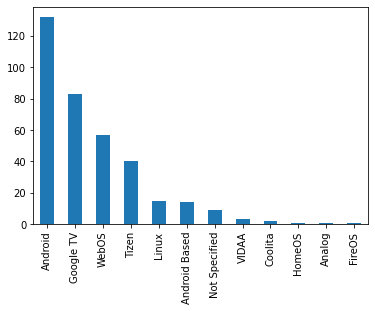

In [33]:
counts = df['os'].value_counts()
counts.plot(kind='bar')
plt.show()

In [34]:
df['os'].value_counts()

Android          132
Google TV         83
WebOS             57
Tizen             40
Linux             15
Android Based     14
Not Specified      9
VIDAA              3
Coolita            2
HomeOS             1
Analog             1
FireOS             1
Name: os, dtype: int64

In [35]:
# Define the cat_os function
def cat_os(inp):
    if inp in ['Android', 'Android Based']:
        return 'Android'
    elif inp in ['Not Specified', 'VIDAA', 'Coolita', 'HomeOS', 'Analog', 'FireOS']:
        return 'Others'
    else:
        return inp

# Apply the function to the 'OS' column
df['os'] = df['os'].apply(cat_os)

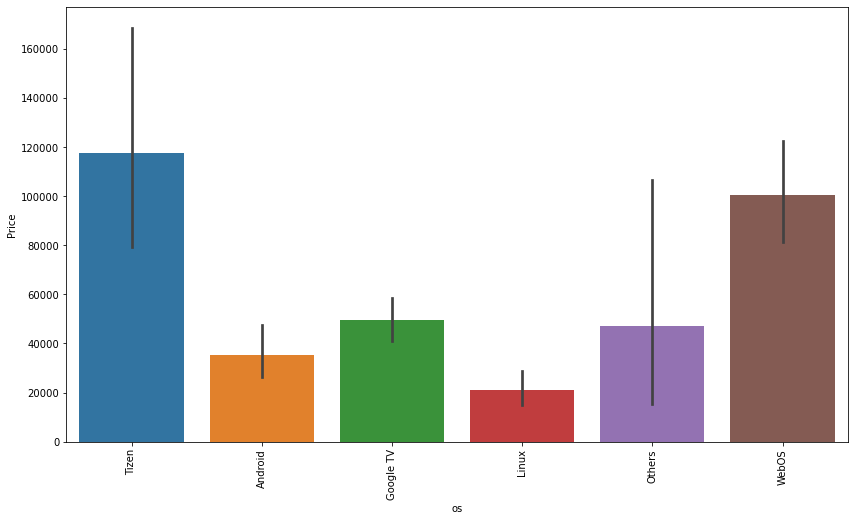

In [36]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='os', y='Price', data=df)  
plt.xlabel('os')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

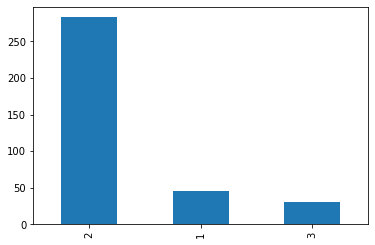

In [37]:
counts = df['usb_count'].value_counts()
counts.plot(kind='bar')
plt.show()

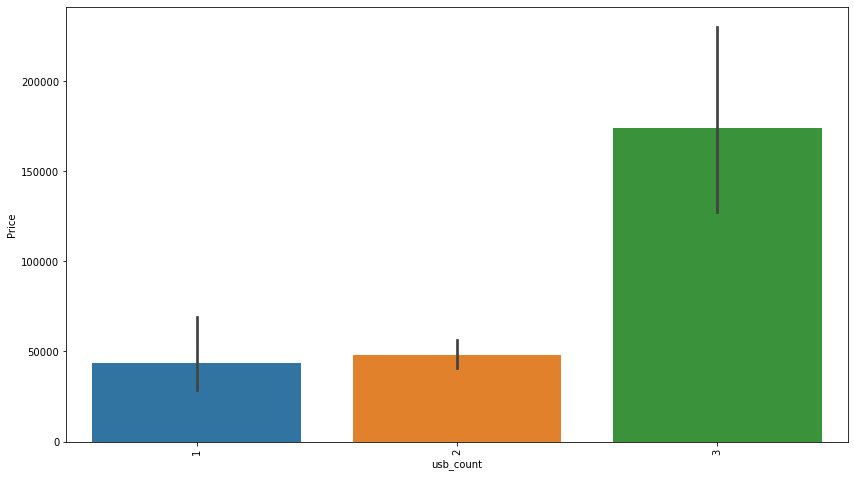

In [38]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='usb_count', y='Price', data=df)  
plt.xlabel('usb_count')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

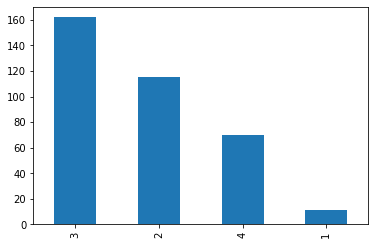

In [39]:
counts = df['hdmi_count'].value_counts()
counts.plot(kind='bar')
plt.show()

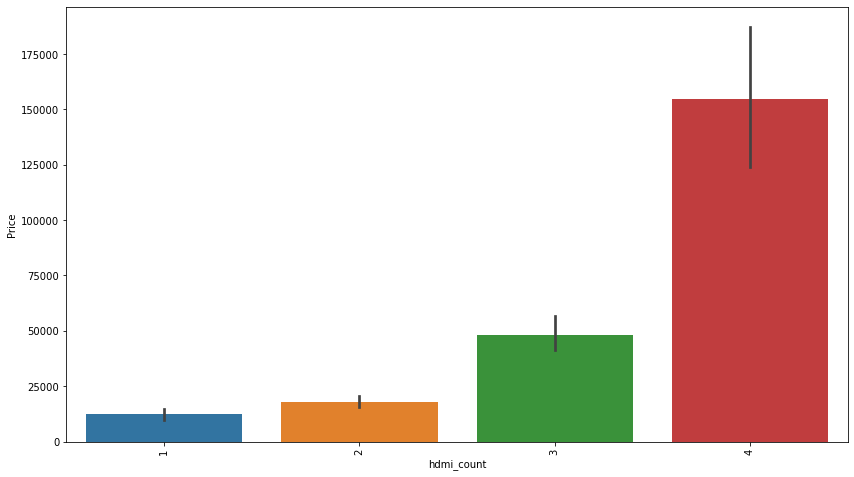

In [40]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='hdmi_count', y='Price', data=df)  
plt.xlabel('hdmi_count')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

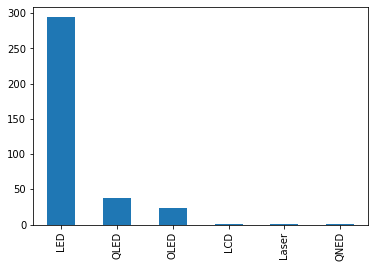

In [41]:
counts = df['screen_type'].value_counts()
counts.plot(kind='bar')
plt.show()

In [42]:
df['screen_type'].value_counts()

LED      294
QLED      38
OLED      23
LCD        1
Laser      1
QNED       1
Name: screen_type, dtype: int64

In [43]:
# Define the cat_os function
def cat_screen(inp):
    if inp in ['LCD', 'Laser','QNED']:
        return 'LCD/Laser/QNED'
    else:
        return inp

# Apply the function to the 'OS' column
df['screen_type'] = df['screen_type'].apply(cat_screen)


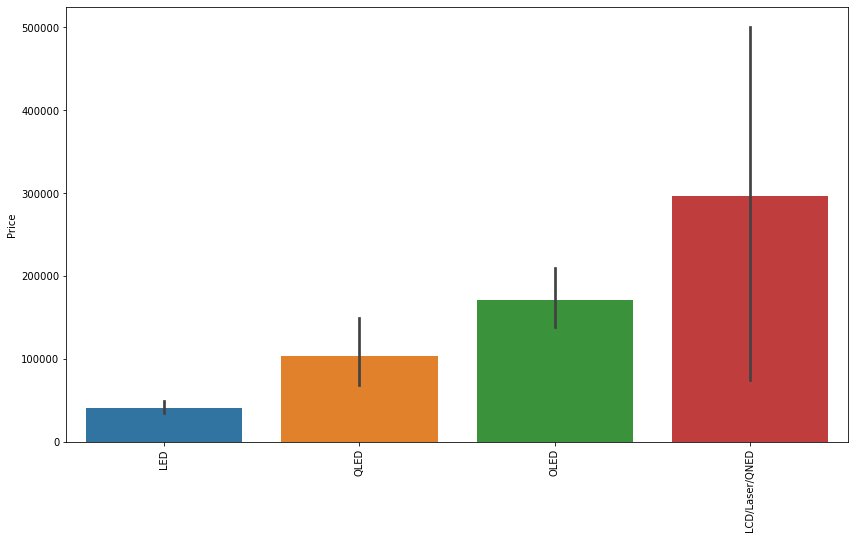

In [44]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='screen_type', y='Price', data=df)  
plt.xlabel(' ')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

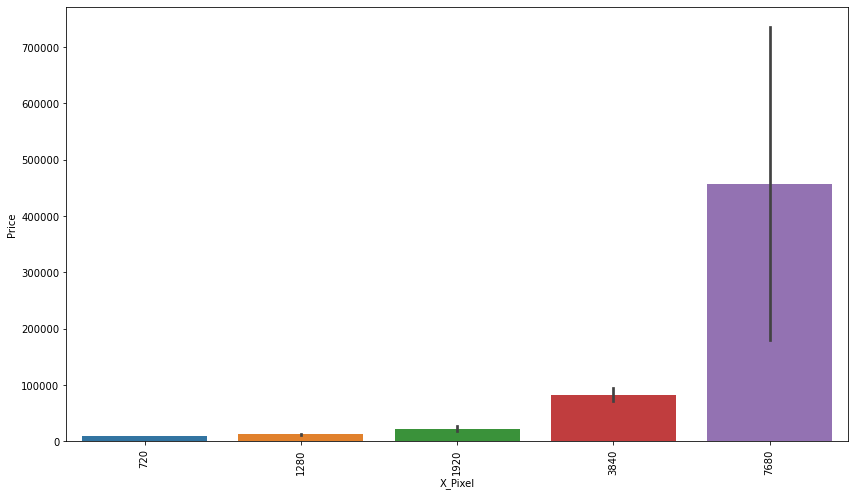

In [45]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='X_Pixel', y='Price', data=df)  
plt.xlabel('X_Pixel')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

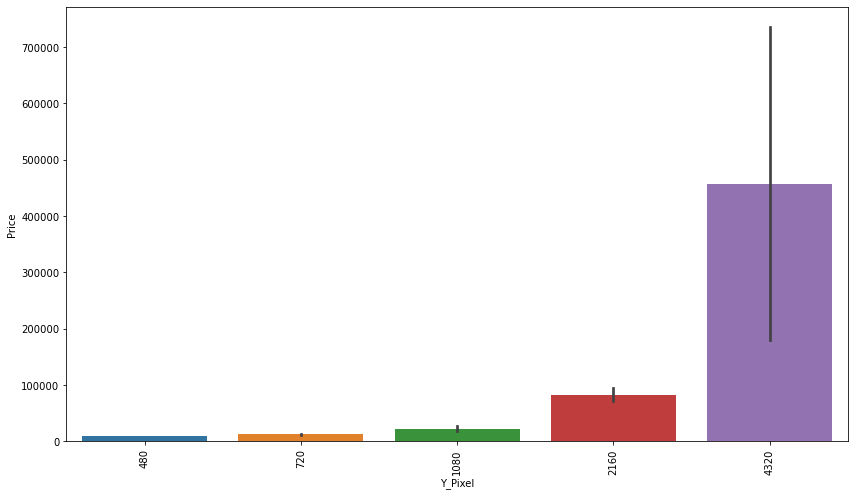

In [46]:
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.barplot(x='Y_Pixel', y='Price', data=df)  
plt.xlabel('Y_Pixel')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [47]:
df.corr().Price

Y_Pixel                0.466768
X_Pixel                0.466689
Display size (cm)      0.657844
Display size (inch)    0.642861
launch_year           -0.178438
smart_tv               0.135026
usb_count              0.299520
hdmi_count             0.526666
Price                  1.000000
Name: Price, dtype: float64

In [48]:
df.drop(columns=['Display size (cm)'], inplace=True)

In [49]:
df.head(2)

,Y_Pixel,X_Pixel,Resolution_Type,Brand,Display size (inch),model_name,launch_year,smart_tv,os,usb_count,hdmi_count,screen_type,Price
0,720,1280,HD Ready,SAMSUNG,32,UA32T4380AKXXL,2022,1,Tizen,1,2,LED,11990
1,720,1280,HD Ready,iFFALCON,32,iFF32S53,2023,1,Android,1,2,LED,8999


In [50]:
df.corr()

,Y_Pixel,X_Pixel,Display size (inch),launch_year,smart_tv,usb_count,hdmi_count,Price
Y_Pixel,1.000000,0.999983,0.769661,0.022016,0.332068,0.184689,0.668477,0.466768
X_Pixel,0.999983,1.000000,0.769590,0.021719,0.333151,0.184559,0.668432,0.466689
Display size (inch),0.769661,0.769590,1.000000,-0.006798,0.306074,0.164525,0.634103,0.642861
launch_year,0.022016,0.021719,-0.006798,1.000000,0.212654,-0.163233,-0.124283,-0.178438
smart_tv,0.332068,0.333151,0.306074,0.212654,1.000000,0.057693,0.254284,0.135026
usb_count,0.184689,0.184559,0.164525,-0.163233,0.057693,1.000000,0.356185,0.299520
hdmi_count,0.668477,0.668432,0.634103,-0.124283,0.254284,0.356185,1.000000,0.526666
Price,0.466768,0.466689,0.642861,-0.178438,0.135026,0.299520,0.526666,1.000000


In [51]:
df['Total Pixels'] = df['Y_Pixel'] * df['X_Pixel']

In [52]:
df.corr().Price

Y_Pixel                0.466768
X_Pixel                0.466689
Display size (inch)    0.642861
launch_year           -0.178438
smart_tv               0.135026
usb_count              0.299520
hdmi_count             0.526666
Price                  1.000000
Total Pixels           0.508590
Name: Price, dtype: float64

In [53]:
df.drop(columns=['X_Pixel'], inplace=True)
df.drop(columns=['Y_Pixel'], inplace=True)


In [54]:
# Assuming you have a DataFrame df with columns 'Total Pixels' and 'Display size (inch)'
df['Pixels_per_Inch'] = df['Total Pixels'] / df['Display size (inch)']

In [55]:
df.drop(columns=['Total Pixels'], inplace=True)
df.drop(columns=['Display size (inch)'], inplace=True)

In [56]:
df.corr()

,launch_year,smart_tv,usb_count,hdmi_count,Price,Pixels_per_Inch
launch_year,1.000000,0.212654,-0.163233,-0.124283,-0.178438,0.039379
smart_tv,0.212654,1.000000,0.057693,0.254284,0.135026,0.283236
usb_count,-0.163233,0.057693,1.000000,0.356185,0.299520,0.161216
hdmi_count,-0.124283,0.254284,0.356185,1.000000,0.526666,0.546074
Price,-0.178438,0.135026,0.299520,0.526666,1.000000,0.320677
Pixels_per_Inch,0.039379,0.283236,0.161216,0.546074,0.320677,1.000000


<AxesSubplot:>

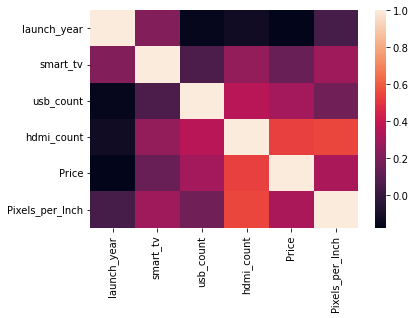

In [57]:
sns.heatmap(df.corr())

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

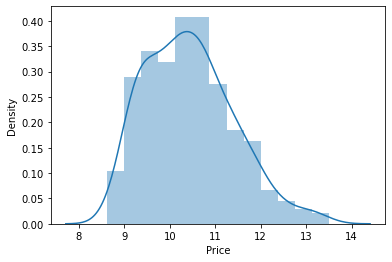

In [58]:
sns.distplot(np.log(df['Price']))

In [59]:
df.head()

,Resolution_Type,Brand,model_name,launch_year,smart_tv,os,usb_count,hdmi_count,screen_type,Price,Pixels_per_Inch
0,HD Ready,SAMSUNG,UA32T4380AKXXL,2022,1,Tizen,1,2,LED,11990,28800.000000
1,HD Ready,iFFALCON,iFF32S53,2023,1,Android,1,2,LED,8999,28800.000000
2,Ultra HD (4K),iFFALCON,iFF43U62,2022,1,Google TV,1,3,LED,17999,192893.023256
3,Ultra HD (4K),Thomson,50OPMAXGT9020,2023,1,Google TV,2,3,LED,22999,165888.000000
4,Full HD,Mi,L40M8-5AIN,2023,1,Google TV,2,2,LED,20499,51840.000000


In [60]:
desired_order = [
    'Brand',
    'model_name',
    'launch_year',
    'Resolution_Type',
    'os',
    'screen_type',
    'smart_tv',
    'usb_count',
    'hdmi_count',
    'Pixels_per_Inch',
    'Price'
]
# Reorder the DataFrame
df = df[desired_order]

In [61]:
df.drop(columns=['model_name'], inplace=True)

In [62]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [63]:
X


,Brand,launch_year,Resolution_Type,os,screen_type,smart_tv,usb_count,hdmi_count,Pixels_per_Inch
0,SAMSUNG,2022,HD Ready,Tizen,LED,1,1,2,28800.000000
1,iFFALCON,2023,HD Ready,Android,LED,1,1,2,28800.000000
2,iFFALCON,2022,Ultra HD (4K),Google TV,LED,1,1,3,192893.023256
3,Thomson,2023,Ultra HD (4K),Google TV,LED,1,2,3,165888.000000
4,Mi,2023,Full HD,Google TV,LED,1,2,2,51840.000000
...,...,...,...,...,...,...,...,...,...
353,LG,2022,Ultra HD (4K),WebOS,LED,1,2,3,192893.023256
354,Panwood,2023,HD Ready,Android,LED,1,2,2,28800.000000
355,Others,2022,Full HD,Android,LED,1,2,2,64800.000000
356,Others,2023,Ultra HD (4K),Android,LED,1,3,2,150807.272727


In [64]:
y

0       9.391828
1       9.104869
2       9.798071
3      10.043206
4       9.928131
         ...    
353    10.518403
354     9.099409
355     9.417355
356    10.448425
357     9.716555
Name: Price, Length: 358, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [66]:
X_train

,Brand,launch_year,Resolution_Type,os,screen_type,smart_tv,usb_count,hdmi_count,Pixels_per_Inch
228,IMPEX,2022,Ultra HD (4K),Android,LED,1,2,4,127606.153846
152,Compaq,2021,Ultra HD (4K),Android,LED,1,2,3,165888.000000
173,LG,2020,Ultra HD (4K),WebOS,LED,1,3,4,150807.272727
12,Thomson,2020,HD Ready,Android,LED,1,2,3,28800.000000
13,iFFALCON,2022,Ultra HD (4K),Google TV,LED,1,1,3,165888.000000
...,...,...,...,...,...,...,...,...,...
299,Sansui,2020,Ultra HD (4K),Google TV,LED,1,2,3,118491.428571
22,Blaupunkt,2023,Ultra HD (4K),Google TV,LED,1,2,3,150807.272727
72,CANDY,2023,Ultra HD (4K),Google TV,LED,1,2,4,150807.272727
15,Hisense,2022,Ultra HD (4K),Google TV,LED,1,2,3,150807.272727


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [68]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear regression

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8827606261921386
MAE 0.20834765350127663


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Ridge Regression

In [70]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8425390844563576
MAE 0.2787028069674306


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Lasso Regression

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8964052477144798
MAE 0.20269817411348953


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Decision Tree

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.878657623518818
MAE 0.2457718014082461


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# SVM

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6432949744309324
MAE 0.4748745624584707


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Random Forest

In [76]:
#Random Forest
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9262639240010809
MAE 0.2065624494585607


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# AdaBoost

In [77]:
#AdaBoost
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8541802868769802
MAE 0.3015927426015943


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Gradient Boost

In [82]:
#Gradient Boost
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.936579406833475
MAE 0.16222491063348946


# XgBoost

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8949666722579541
MAE 0.17707650321545845


C:\Users\anuja\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Exporting the model


In [83]:
import pickle

In [84]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [85]:
import sklearn
import joblib

print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

scikit-learn version: 1.2.2
joblib version: 1.3.2
